# Team 20 Phase II

### Team Members:
- An Ding
- Brennan Jacobs
- Christopher David
- Benjamin Shaar

## Problem Motivation 

Mixed Martial Arts (MMA) is a dynamic and complex sport that requires a combination of physical attributes, technical skill, and strategic intelligence. The question arises: what characteristics make an MMA fighter successful? While attributes such as height, reach, and stance play a role in a fighter's effectiveness, other aspects like match strategy and fight intelligence might be equally—if not more—important. This project aims to explore the relationship between physical attributes and fight outcomes, helping to determine which factors contribute most to success in the octagon. By analyzing historical fight data, I hope to identify trends that can be used to predict fight results and provide recommendations for aspiring MMA athletes. Additionally, this project will allow me to explore correlations between specific physical traits and fight outcomes, potentially revealing whether certain features provide an advantage in specific matchups.

## Summary of the Data Processing Pipeline

1. Web scrape to get the raw data
2. Clean the data to prepare the data frame for visualization and analysis
3. Visualize using plotting libraries, such as Seaborn, Plotly, and Matplotlib


## Data Gathering


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Url for scraping
url = 'http://ufcstats.com/statistics/fighters'

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

# locates the table
mma_stats_table = soup.find('table', class_='b-statistics__table')

# header of the table (makes sure DF has proper column names) 
headers = [header.text.strip() for header in mma_stats_table.find_all('th')]

# table rows 
rows = []

# gets rid of the first two headers 
for row in mma_stats_table.find_all('tr')[2:]: 
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    
    if cols: 
        rows.append(cols)

# creates the data frame, printing the column names as the headers 
df = pd.DataFrame(rows, columns=headers)

# Output 
print(df)

        First          Last              Nickname     Ht.       Wt.  Reach  \
0         Tom         Aaron                            --  155 lbs.     --   
1       Danny        Abbadi          The Assassin  5' 11"  155 lbs.     --   
2     Nariman       Abbasov             Bayraktar   5' 8"  155 lbs.  66.0"   
3       David        Abbott                  Tank   6' 0"  265 lbs.     --   
4       Hamdy    Abdelwahab            The Hammer   6' 2"  264 lbs.  72.0"   
5      Mansur   Abdul-Malik                         6' 2"  185 lbs.  79.0"   
6      Shamil  Abdurakhimov                 Abrek   6' 3"  235 lbs.  76.0"   
7    Hiroyuki           Abe               Abe Ani   5' 6"  145 lbs.     --   
8      Daichi           Abe                        5' 11"  170 lbs.  71.0"   
9        Papy         Abedi               Makambo  5' 11"  185 lbs.     --   
10    Ricardo         Abreu               Demente  5' 11"  185 lbs.     --   
11    Klidson         Abreu            White Bear   6' 0"  205 l

## Data Cleaning

In [9]:
def get_ufc_table(letter) :
    """ Gets and returns the table of UFC fighters for a given letter of the English alphabet.
    Args:
        letter (str) : a single character stirng comprised of one of the 26 English letters.
    Returns:
        ufc_df (pd.DataFrame): an unclean dataframe containing the known stats for every fighter with a last name 
        that starts with a given English letter. It has the following set of columns:
            First (str) : the given name of a fighter.
            Last (str) : the family name of a fighter.
            Nickname (str): the nickname of a fighter, which may not exist.
            Ht. (str): the recorded height of a fighter, given in the following format US Customary feet' US Customary inches".
            Wt. (str): the recorded weight of a fighter, given in US Customary pounds.
            Reach (str): the recorded max length for a fighter's attacks, given in US Customary inches.
            Stance (str): the recorded favored stance of a fighter, which may not exist.
            W (str): the number of recorded fights won by a fighter.
            L (str): the number of recorded fights lost by a fighter.
            D (str): the number of recorded fights tied by a fighter.
            Belt (bool): whether a fighter possesses one of the UFC
    """
    parameters = {'char': letter, 'page': 'all'}
    ufc_response = requests.get('http://ufcstats.com/statistics/fighters', params=parameters)
    ufc_soup = BeautifulSoup(ufc_response.text, "html.parser")
    # locates the table
    fun_mma_stats_table = ufc_soup.find('table', class_='b-statistics__table')

    # header of the table (makes sure DF has proper column names) 
    ufc_headers = [ufc_header.text.strip() for ufc_header in mma_stats_table.find_all('th')]

    # table rows 
    ufc_rows = []

    # gets rid of the first two headers 
    for ufc_row in fun_mma_stats_table.find_all('tr')[2:]: 
        ufc_cols = ufc_row.find_all('td')
        ufc_cols = [ufc_col.text.strip() for ufc_col in ufc_cols]
        if ufc_cols: 
            ufc_rows.append(ufc_cols)
    # creates the data frame, printing the column names as the headers 
    ufc_df = pd.DataFrame(ufc_rows, columns=ufc_headers)
    return ufc_df
get_ufc_table('b').head()

,First,Last,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt
0,Niklas,Backstrom,,"6' 1""",145 lbs.,--,Orthodox,11,3,0,
1,Seth,Baczynski,The Polish Pistola,"6' 3""",170 lbs.,"75.0""",Orthodox,20,14,0,
2,Abdul Azeem,Badakhshi,The Afghan Lion,--,145 lbs.,--,,13,3,0,
3,Ryan,Bader,Darth,"6' 2""",205 lbs.,"74.0""",Orthodox,23,5,0,
4,Izabela,Badurek,,"5' 5""",115 lbs.,--,Orthodox,6,3,0,


In [10]:
def get_all_ufc_fighters() :
    """ Gets every UFC fighter's stats in a single dataframe.
    Returns:
        merged_ufc_df (pd.DataFrame) : the merged dataframe containing every fighter. It has the same format as 
        get_ufc_table's return dataframe.
    """
    alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 
                'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    merged_ufc_df = pd.DataFrame()
    for letter in alphabet :
        merged_ufc_df = pd.concat([merged_ufc_df, get_ufc_table(letter)], axis=0, ignore_index=True)
    return merged_ufc_df
all_fighters = get_all_ufc_fighters()
all_fighters.head()

,First,Last,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt
0,Tom,Aaron,,--,155 lbs.,--,,5,3,0,
1,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0,
2,Nariman,Abbasov,Bayraktar,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0,
3,David,Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0,
4,Hamdy,Abdelwahab,The Hammer,"6' 2""",264 lbs.,"72.0""",Southpaw,6,0,0,


In [11]:
def clean_ufc_df_row(df_row) :
    """ Cleans and returns a given fighter's row of a dataframe.
    Args : 
        df_row (pd.Series): the row of a get_ufc_table style dataframe to clean.
    Returns :
        df_row (pd.Series): the cleaned row, with the following modifications: 
            Ht., Wt., and Reach are now float representations of their preceding forms;
            Stances that are blank are now noted as Unrecorded;
            W, L, D are now int representations fo their preceding forms.
    """
    if df_row['Ht.'] != '--' :
        (feet, inches) = df_row['Ht.'].split(' ')
        height = float(feet[:-1]) * 12.0
        height += float(inches[:-1])
        df_row['Ht.'] = height
    else :
        df_row['Ht.'] = float('nan')
    if df_row['Wt.'] != '--' :
        df_row['Wt.'] = float(df_row['Wt.'][:df_row['Wt.'].find(' ')])
    else :
        df_row['Wt.'] = float('nan')
    if df_row['Reach'] != '--' :
        df_row['Reach'] = float(df_row['Reach'][:-1])
    else :
        df_row['Reach'] = float('nan')
    if df_row['Stance'] == '' :
        df_row['Stance'] = 'Unrecorded'
    df_row['W'] = int(df_row['W'])
    df_row['L'] = int(df_row['L'])
    df_row['D'] = int(df_row['D'])
    return df_row

def clean_ufc_df(ufc_df) :
    """ Cleans and returns a given UFC DataFrame using df.apply.
    Args :
        ufc_df (pd.DataFrame): the dataframe to be cleaned; uses get_ufc_table columns.
    Returns :
        ufc_df (pd.DataFrame): the cleaned dataframe using clean_ufc_df_row.
    """
    return ufc_df.apply(clean_ufc_df_row, axis=1)


all_fighters = clean_ufc_df(all_fighters)


## Visualization


In [14]:
# Set libraries
import seaborn as sns
import matplotlib.pyplot as plt

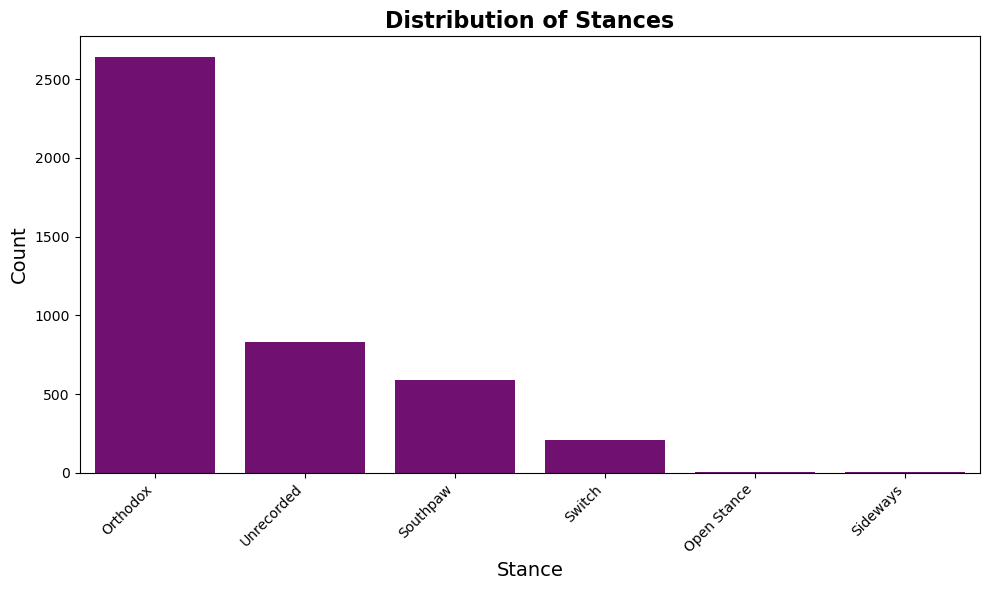

In [15]:
# Set descending order based on count
stance_order = all_fighters['Stance'].value_counts().index

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the countplot
sns.countplot(
    data=all_fighters,
    x='Stance',
    order=stance_order,
    color='purple'
)

# Add titles and labels
plt.title('Distribution of Stances', fontsize=16, fontweight='bold')
plt.xlabel('Stance', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout 
plt.tight_layout()

# Show the plot
plt.show()

## Visualization #2 

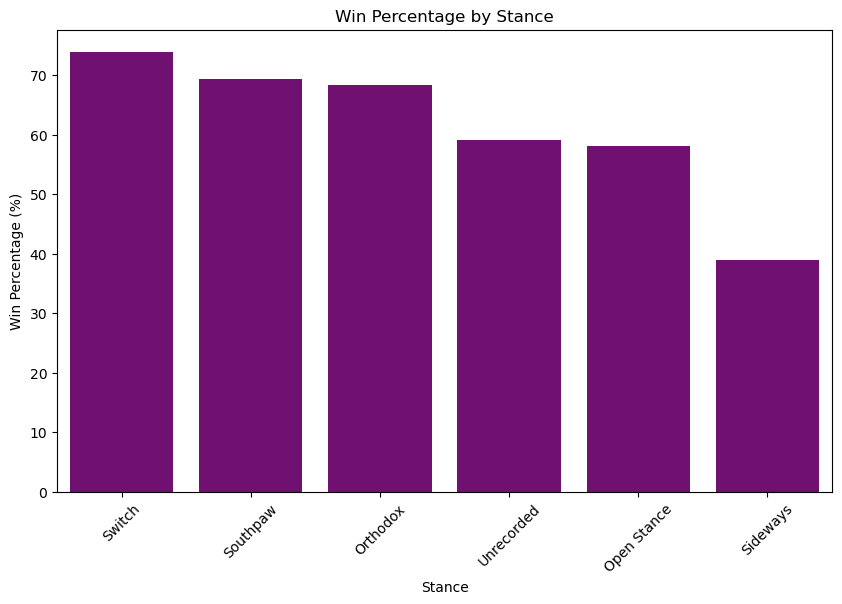

In [36]:
# calculates win percentage for each stance
all_fighters['Win Percentage'] = all_fighters['W'] / (all_fighters['W'] + all_fighters['L']) * 100
stance_win = all_fighters.groupby('Stance')['Win Percentage'].mean().sort_values(ascending=False)

# create the figure 
plt.figure(figsize=(10, 6))

#plot the barplot 
sns.barplot(
    x=stance_win.index, 
    y=stance_win.values, 
    color='purple')

# add title and labels 
plt.title('Win Percentage by Stance')
plt.xlabel('Stance')
plt.ylabel('Win Percentage (%)')

# Rotate x-axis labels
plt.xticks(rotation=45)

# show the plot
plt.show()
